# Challenge Alura - TelecomX

## 📌 Extracción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

#### ✅ Cargar los datos directamente desde la API utilizando Python.

In [398]:
import pandas as pd

# Cargar los datos directamente desde la API utilizando Python
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# url = 'TelecomX_Data.json' 

#### ✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [399]:
try:
    # Convertir los datos a un DataFrame de Pandas
    Datos = pd.read_json(url)
    print(f"DataFrame cargado exitosamente. Filas: {len(Datos)}, Columnas: {len(Datos.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 6


In [400]:
Datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#### ✅ Normalización de las columnas | Archivo JSON

In [401]:
# Datos anidados 
# Columnas [customer, phone, internet, account]
Datos_Norm_customer = pd.json_normalize(Datos['customer'])
Datos_Norm_phone = pd.json_normalize(Datos['phone'])
Datos_Norm_internet = pd.json_normalize(Datos['internet'])
Datos_Norm_account = pd.json_normalize(Datos['account'])

In [402]:
#Forma de concatenar Series
#Nuevo DF
Datos_Norm = pd.concat([Datos['customerID'], Datos['Churn'], Datos_Norm_customer, Datos_Norm_phone,Datos_Norm_internet, Datos_Norm_account], axis=1)
Datos_Norm.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔧 Transformación

### Conoce el conjunto de datos

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

#### ¿Qué debes hacer?

##### ✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [403]:
# Anterior df
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [404]:
# Anterior df
Datos.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [405]:
#Nuevo df
Datos_Norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [406]:
Datos_Norm.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [407]:
print(f"Datos_Norm contiene. Filas: {len(Datos_Norm)}, Columnas: {len(Datos_Norm.columns)}")


Datos_Norm contiene. Filas: 7267, Columnas: 21


##### ✅ Consultar el diccionario para comprender mejor el significado de las variables.
##### ✅ Identificar las columnas más relevantes para el análisis de evasión.

### Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

#### ¿Qué debes hacer?
---
##### Buscar:

#### Consistencia y validez de datos categorias

##### Duplicados

In [408]:
#Verificando si hay duplicados
duplicados = Datos_Norm.duplicated().sum() 
print(f"Numero de lineas duplicadas: {duplicados}")

Numero de lineas duplicadas: 0


##### Valores Vacios


In [409]:
for col in Datos_Norm.columns:
        vacios = (Datos_Norm[col] == "").sum()  # Cuenta los valores exactamente iguales a ""
        print(f" • {col}: {vacios} valores vacíos ('')")
        #Si el numero de valores vacios es mayor a 0, muestra ejemplos de los datos vacios
        if vacios > 0:
            print(f"Las Filas tienen datos vacios son: ", Datos_Norm[Datos_Norm[col] == ""][col].sample(5))  # Muestra ejemplos si hay vacíos
            print('-' * 50)

 • customerID: 0 valores vacíos ('')
 • Churn: 224 valores vacíos ('')
Las Filas tienen datos vacios son:  1517    
7211    
2154    
5332    
6385    
Name: Churn, dtype: object
--------------------------------------------------
 • gender: 0 valores vacíos ('')
 • SeniorCitizen: 0 valores vacíos ('')
 • Partner: 0 valores vacíos ('')
 • Dependents: 0 valores vacíos ('')
 • tenure: 0 valores vacíos ('')
 • PhoneService: 0 valores vacíos ('')
 • MultipleLines: 0 valores vacíos ('')
 • InternetService: 0 valores vacíos ('')
 • OnlineSecurity: 0 valores vacíos ('')
 • OnlineBackup: 0 valores vacíos ('')
 • DeviceProtection: 0 valores vacíos ('')
 • TechSupport: 0 valores vacíos ('')
 • StreamingTV: 0 valores vacíos ('')
 • StreamingMovies: 0 valores vacíos ('')
 • Contract: 0 valores vacíos ('')
 • PaperlessBilling: 0 valores vacíos ('')
 • PaymentMethod: 0 valores vacíos ('')
 • Charges.Monthly: 0 valores vacíos ('')
 • Charges.Total: 0 valores vacíos ('')


In [410]:
# Verificando si hay valores nulos
Datos_Norm.iloc[30]

customerID                         0047-ZHDTW
Churn                                        
gender                                 Female
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
tenure                                     11
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                           No
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
Charges.Monthly                          79.0
Charges.Total                           929.3
Name: 30, dtype: object

In [411]:
Datos_Norm.iloc[4541]

customerID                6225-VNQSJ
Churn                               
gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
Charges.Monthly                35.45
Charges.Total                  35.45
Name: 4541, dtype: object

Otra forma de consultar valores vacios

In [412]:
Churn_a = Datos_Norm[Datos_Norm['Churn'] == '']
Churn_a.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5179,7069-PURBI,,Female,0,Yes,No,14,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.40,292.4
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
1013,1427-GOPMO,,Male,0,No,No,57,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,One year,Yes,Electronic check,86.90,4939.25


##### Valores Nulos

In [413]:
# Verificando se hay valores Nulos
valores_nulos = Datos_Norm.isnull().values.sum() 
print("\nValores nulos por columna: ") 
print(valores_nulos [valores_nulos > 0])


Valores nulos por columna: 
[]


In [414]:
# Formas
Datos_Norm.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

##### Valores Atipicos

In [415]:
for col in Datos_Norm.columns:
    únicos = Datos_Norm[col].nunique(dropna=False)
    print(f"Columna '{col}': {únicos} valores únicos")
    if únicos <= 50:    # Imprima los valores si no hay muchos
        print(Datos_Norm[col].unique())
        print('-' * 40) # Linea divisora para una mejor visualizacion

Columna 'customerID': 7267 valores únicos
Columna 'Churn': 3 valores únicos
['No' 'Yes' '']
----------------------------------------
Columna 'gender': 2 valores únicos
['Female' 'Male']
----------------------------------------
Columna 'SeniorCitizen': 2 valores únicos
[0 1]
----------------------------------------
Columna 'Partner': 2 valores únicos
['Yes' 'No']
----------------------------------------
Columna 'Dependents': 2 valores únicos
['Yes' 'No']
----------------------------------------
Columna 'tenure': 73 valores únicos
Columna 'PhoneService': 2 valores únicos
['Yes' 'No']
----------------------------------------
Columna 'MultipleLines': 3 valores únicos
['No' 'Yes' 'No phone service']
----------------------------------------
Columna 'InternetService': 3 valores únicos
['DSL' 'Fiber optic' 'No']
----------------------------------------
Columna 'OnlineSecurity': 3 valores únicos
['No' 'Yes' 'No internet service']
----------------------------------------
Columna 'OnlineBackup': 

##### Tipos de datos

In [416]:
print("▶ Tipos de datos:\n")
print(Datos_Norm.dtypes)
print("\n▶ Columnas tipo object que podrían ser numéricas:\n")
for col in Datos_Norm.select_dtypes(include='object'):
    muestra = Datos_Norm[col].dropna().astype(str).str.replace('.', '', 1).str.isnumeric()
    if muestra.sum() > 0 and muestra.sum() < len(Datos_Norm[col]):
        print(f"• {col}: contiene valores que parecen números pero están como texto.")

▶ Tipos de datos:

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

▶ Columnas tipo object que podrían ser numéricas:

• Charges.Total: contiene valores que parecen números pero están como texto.


##### Normalizacion de texto

### Manejo de inconsistencias
Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.


#### Manejo de tipo de datos

##### Uso de memoria Anterior

In [417]:
Datos_Norm.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##### Cambio de tipo de dato [*float*], [*string*] y [*bool*]

In [418]:
Datos_Norm['Charges.Total'] = pd.to_numeric(Datos_Norm['Charges.Total'], errors='coerce').fillna(0)
Datos_Norm['customerID'] = Datos_Norm['customerID'].astype('string')
Datos_Norm['SeniorCitizen'] = Datos_Norm['SeniorCitizen'].astype('bool')


##### Cambio de tipo de dato [*Categorico*]

In [419]:
# Columnas categóricas
columnas_categoricas = [
    'gender', 'Partner', 'Dependents', 'Churn', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in columnas_categoricas:
    Datos_Norm[col] = Datos_Norm[col].astype('category')

In [420]:
# Analizando el uso de memoria con el cambio de tipo de dato
Datos_Norm.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   string  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

#### Manejo de Columnas

##### Estandarizacion de caracteres

In [421]:
Datos_Norm.columns = Datos_Norm.columns.str.lower().str.replace(' ', '_')
Datos_Norm.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##### Verificacion de datos nulos

In [422]:
valores_nulos = Datos_Norm.isna().values.sum() 
print(f"Valores nulos por columna:\n {col} {valores_nulos [valores_nulos > 0]}") 


Valores nulos por columna:
 PaymentMethod []


In [423]:
for col in Datos_Norm.columns:
    vacios = Datos_Norm[col].isna().values.sum()# Cuenta los valores exactamente iguales a ""
    if vacios > 0:
        print(f" • {col}: {vacios} valores nulos")
        print(Datos_Norm[Datos_Norm[col].isna()][col].sample(5))

In [424]:
Datos_Norm.iloc[2930]

customerid            4075-WKNIU
churn                         No
gender                    Female
seniorcitizen              False
partner                      Yes
dependents                   Yes
tenure                         0
phoneservice                 Yes
multiplelines                Yes
internetservice              DSL
onlinesecurity                No
onlinebackup                 Yes
deviceprotection             Yes
techsupport                  Yes
streamingtv                  Yes
streamingmovies               No
contract                Two year
paperlessbilling              No
paymentmethod       Mailed check
charges.monthly            73.35
charges.total                0.0
Name: 2930, dtype: object

Pareciera que los Nan y el Valor de 0 en la columna 'tenure' coincide.

#### Consulta de tenure y los valores Nan

Prueba

Aqui vemos que la relacion de tenure = 1
quiere decir que las columnas 'charges.monthly' y 'charges.total' son iguales

In [425]:
tenure_1 = Datos_Norm[Datos_Norm['tenure'] == 1]
tenure_1.head(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
17,0021-IKXGC,No,Female,True,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,72.1,72.1
19,0023-HGHWL,Yes,Male,True,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.1
25,0032-PGELS,Yes,Female,False,Yes,Yes,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.5,30.5


In [426]:
# Esto es para verificar que los customerid de tenure_0 y Valor_Nan son los mismos
comparacion_equals_2 = tenure_1['charges.monthly'].equals(tenure_1['charges.total'])
comparacion_equals_2

True

Buscamos tenure con equivalencia a 0

In [427]:
tenure_0 = Datos_Norm[Datos_Norm['tenure'] == 0]
tenure_0.head(11)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
975,1371-DWPAZ,No,Female,False,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,False,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,False,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,False,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,False,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,False,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,False,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,False,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,False,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,False,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [428]:
Valor_Nan = Datos_Norm[Datos_Norm['charges.total'].isna()]
Valor_Nan.head(11)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total


In [429]:
# Esto es para verificar que los customerid de tenure_0 y Valor_Nan son los mismos
comparacion_equals = tenure_0['customerid'].equals(Valor_Nan['customerid'])
comparacion_equals

False

Aun no se ha cobrado el servicio (Tenure = 0), por lo que no hay un valor de cobro total (NaN).
Por lo tanto, no es necesario eliminar estos valores, ya que son válidos en el dataset.
Así que, lo conveniente seria tratar al valor como 0 en el valor de cobro total.

#### Tratamiento de NaN

Se añadio en la parte de 'Manejo de dato', un extra que al momento de normalizar, si encuentra un valor NaN lo reemplaze por "0"

```
 Datos_Norm['Charges.Total'] = pd.to_numeric(Datos_Norm['Charges.Total'], errors='coerce').fillna(0)
```

#### Arreglo de "" en 'churn'

Segun la comprobacion de Datos en Valores Vacios ("")<br>• Churn: Tiene 224 valores vacíos ('')


##### Comprobar de datos ("") en Churn

In [430]:
Churn_a = Datos_Norm[Datos_Norm['churn'] == '']
Churn_a.sample(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
3833,5243-NIEIT,,Male,False,Yes,No,14,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.15,1139.20
5215,7117-EVURU,,Male,False,No,No,39,No,No phone service,DSL,...,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),48.95,1880.85
6888,9499-EBKUR,,Male,False,No,No,72,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10


In [431]:
for col in Datos_Norm.columns:
        vacios = (Datos_Norm[col] == "").sum()  # Cuenta los valores exactamente iguales a ""
        #Si el numero de valores vacios es mayor a 0, muestra ejemplos de los datos vacios
        if vacios > 0:
            print(f" • {col}: {vacios} valores vacíos ('')")
            print(f"Las Filas tienen datos vacios son: ", Datos_Norm[Datos_Norm[col] == ""][col].head(3))  # Muestra ejemplos si hay vacíos
            print('-' * 50)

 • churn: 224 valores vacíos ('')
Las Filas tienen datos vacios son:  30    
75    
96    
Name: churn, dtype: category
Categories (3, object): ['', 'No', 'Yes']
--------------------------------------------------


##### Funcion que transforma los datos vacios ("")

¿Por qué se hizo esta función?<br>

En muchos registros del dataset de clientes, la columna `churn` (abandono) aparece vacía.<br>
Para poder analizar y modelar estos datos correctamente, es importante completar esos valores.<br>

Esta función utiliza una **estrategia heurística**, es decir, una lógica basada en el sentido común<br>
y patrones observados en los datos reales:<br>

- Clientes nuevos y sin contrato a largo plazo tienden a irse más fácilmente.
- El pago con cheque electrónico suele asociarse con menor fidelización.
- El alto costo mensual sin beneficios adicionales puede aumentar la probabilidad de cancelación.

La función evalúa esas condiciones y asigna `"Yes"` (abandonó) o `"No"` (sigue) a los clientes<br>
que no tenían etiqueta, sin necesidad de usar algoritmos complejos de aprendizaje automático.<br>

Este enfoque es útil como solución inicial o cuando no se dispone de un modelo entrenado.

In [432]:
def Asignacion_de_Churn(datos):
    datos = datos.copy()  # Se hace una copia para no modificar el DataFrame original

    # Calculamos el tercer cuartil de gastos mensuales
    # Esto nos sirve como referencia para saber qué clientes pagan mucho
    umbral_gasto_alto = datos['charges.monthly'].quantile(0.75)

    # Definimos una función interna que evalúa si un cliente esta en "riesgoso"
    # Suma condiciones y marca como "Sí" (abandona) si se cumplen 3 o más
    def evaluar_riesgo(fila):
        condiciones_riesgo = 0

        # Cliente con contrato mes a mes → fácil cancelación
        if fila['contract'] == 'Month-to-month':
            condiciones_riesgo += 1
        # Pago manual con cheque electrónico (Electronic check) → baja fidelización
        if fila['paymentmethod'] == 'Electronic check':
            condiciones_riesgo += 1
        # Antigüedad corta (≤ 6 meses) → cliente aún no afianzado
        if fila['tenure'] <= 6:
            condiciones_riesgo += 1
        # Fibra óptica sin protección de seguridad ('onlinesecurity') → alto coste sin valor añadido
        if fila['internetservice'] == 'Fiber optic' and fila['onlinesecurity'] == 'No':
            condiciones_riesgo += 1
        # Gasto mensual muy alto, por encima del promedio 'Q3'
        if fila['charges.monthly'] > umbral_gasto_alto:
            condiciones_riesgo += 1

        # No tiene ningún servicio adicional (de valor agregado)
        extras = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']
        if all(fila[e] in ['No', 'No internet service'] for e in extras):
            condiciones_riesgo += 1

        # Hace streaming (TV o Películas) con DSL → mala experiencia
        if fila['internetservice'] == 'DSL' and (
            fila['streamingtv'] == 'Yes' or fila['streamingmovies'] == 'Yes'):
            condiciones_riesgo += 1
        # Cliente mayor SIN soporte técnico → posible frustración
        if fila['seniorcitizen'] == 1 and fila['techsupport'] == 'No':
            condiciones_riesgo += 1
    
        # Si cumple 4 o más condiciones de riesgo → se marca como que abandonó (churn = 'Yes')
        return 'Yes' if condiciones_riesgo >= 4 else 'No'

    # Aplicar la lógica solo a los registros que tienen el campo vacío
    ChurnVacio = datos['churn'] == ""
    datos.loc[ChurnVacio, 'churn'] = datos[ChurnVacio].apply(evaluar_riesgo, axis=1)

    return datos

In [433]:
print(Datos_Norm['churn'].value_counts(dropna=False))  # cómo está antes

churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


##### DATAFRAME con Churn completo | Almacenamiento de nuevo DF

In [434]:
Churn_completo = Asignacion_de_Churn(Datos_Norm)

In [435]:
Churn_completo.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Verificacion y Almacenamiento de df

In [436]:
print(Churn_completo['churn'].value_counts(dropna=False))  # cómo está antes

churn
No     5339
Yes    1928
          0
Name: count, dtype: int64


In [437]:
Churn_completo.dtypes

customerid          string[python]
churn                     category
gender                    category
seniorcitizen                 bool
partner                   category
dependents                category
tenure                       int64
phoneservice              category
multiplelines             category
internetservice           category
onlinesecurity            category
onlinebackup              category
deviceprotection          category
techsupport               category
streamingtv               category
streamingmovies           category
contract                  category
paperlessbilling          category
paymentmethod             category
charges.monthly            float64
charges.total              float64
dtype: object

In [438]:
# Manera correcta de guardar el DataFrame en un archivo JSON

df_Churn_ = Churn_completo.to_json(path_or_buf='TelecomX_Data_Churn.json', orient='records', lines=True)

### Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

#### Lectura rapido del nuevo Dataframe

In [439]:
import pandas as pd
# Leer el nuevo df en formato json
url2 = 'TelecomX_Data_Churn.json'


In [440]:
try:
    # Convertir los datos a un DataFrame de Pandas
    df_Datos = pd.read_json(url2, orient='records', lines=True)
    print(f"DataFrame cargado exitosamente. Filas: {len(df_Datos)}, Columnas: {len(df_Datos.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 21


In [441]:
df_Datos.dtypes

customerid           object
churn                object
gender               object
seniorcitizen          bool
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
charges.monthly     float64
charges.total       float64
dtype: object

#### Optimizacion tipo de datos

In [442]:
# cambio de tipo de dato para mejorar el uso de memoria

# customerID cambio de object a string 
df_Datos['customerid'] = df_Datos['customerid'].astype('string')

# Columnas categóricas
columnas_categoricas = [
    'gender', 'partner', 'dependents', 'churn', 'phoneservice',
    'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
    'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
    'contract', 'paperlessbilling', 'paymentmethod'
]

for col in columnas_categoricas:
    df_Datos[col] = df_Datos[col].astype('category')

In [443]:
df_Datos.dtypes

customerid          string[python]
churn                     category
gender                    category
seniorcitizen                 bool
partner                   category
dependents                category
tenure                       int64
phoneservice              category
multiplelines             category
internetservice           category
onlinesecurity            category
onlinebackup              category
deviceprotection          category
techsupport               category
streamingtv               category
streamingmovies           category
contract                  category
paperlessbilling          category
paymentmethod             category
charges.monthly            float64
charges.total              float64
dtype: object

#### Adicion de columna nueva ['charges.daily']

In [444]:
# Forma de Generar nueva columan EJ: df_Datos['Charges.Daily'] = df_Datos['Charges.Monthly'] / 30.436875

# Indicamos donde insertar: después de la columna'paymentmethod' y antes de la columna 'charges.monthly'
pos = df_Datos.columns.get_loc('paymentmethod') + 1   # +1 → inmediatamente después

# Crear e insertar la columna 'charges.daily'
df_Datos.insert(
    pos,                              # posición
    'charges.daily',                  # nombre de la nueva columna
    (df_Datos['charges.monthly'] / 30.417).round(2)  # valor (float, 2 decimales)
)

Porque dividimos a "30,417",porque es la media de dias por mes<br>
Si dividimos los 365 dias del año a 12, tenemos 30,417 dias de media

Formas de visualizar los nuevos datos

In [445]:
df_Datos[['customerid','churn','tenure','contract','charges.daily','charges.monthly','charges.total']].sample(5)

,customerid,churn,tenure,contract,charges.daily,charges.monthly,charges.total
5320,7268-IGMFD,No,18,Month-to-month,3.09,93.90,1743.90
1936,2739-CACDQ,No,17,Month-to-month,2.72,82.65,1470.05
1633,2320-YKQBO,No,7,Month-to-month,0.63,19.30,144.95
2319,3230-JCNZS,No,71,Two year,3.25,99.00,7061.65
5396,7377-DMMRI,Yes,2,Month-to-month,1.57,47.80,92.45


In [446]:
print(df_Datos[['customerid','churn','tenure','contract','charges.daily','charges.monthly','charges.total']].sample(5))

      customerid churn  tenure        contract  charges.daily  \
4330  5947-SGKCL    No      15  Month-to-month           3.46   
5356  7315-WYOAW    No      13  Month-to-month           3.31   
5977  8168-UQWWF   Yes      11  Month-to-month           3.22   
4602  6305-YLBMM   Yes      69        One year           3.42   
2875  3987-KQDDU    No       9  Month-to-month           2.49   

      charges.monthly  charges.total  
4330           105.35        1559.25  
5356           100.75        1313.25  
5977            97.85        1105.40  
4602           104.05        7262.00  
2875            75.60         661.55  


### Estandarización y transformación de datos (*opcional*)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.<br>

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

#### Traduccion de Columnas para mayor legibilidad

In [447]:
# Diccionario de mapeo: inglés → español

cols_es = {
    'customerid'       : 'id_cliente',
    'churn'            : 'abandono_cliente',
    'gender'           : 'genero',
    'seniorcitizen'    : 'jubilado',          # 1 si ≥65 años
    'partner'          : 'pareja',
    'dependents'       : 'dependientes',
    'tenure'           : 'meses_antiguedad',
    'phoneservice'     : 'servicio_telefono',
    'multiplelines'    : 'ad.multiples_lineas',
    'internetservice'  : 'servicio_internet',
    'onlinesecurity'   : 'ad.seguridad_online',
    'onlinebackup'     : 'ad.respaldo_online',
    'deviceprotection' : 'ad.proteccion_dispositivo',
    'techsupport'      : 'ad.soporte_tecnico',
    'streamingtv'      : 'tv.streaming',
    'streamingmovies'  : 'peliculas.streaming',
    'contract'         : 'contrato',
    'paperlessbilling' : 'factura_digital',
    'paymentmethod'    : 'metodo_pago',   
    'charges.daily'    : 'cargo.diario',
    'charges.monthly'  : 'cargo.mensual',
    'charges.total'    : 'cargo.total'
}

df_Datos.rename(columns=cols_es, inplace=True)

In [448]:
df_Datos.sample(3)

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
611,0871-OPBXW,No,Female,False,No,No,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0.66,20.05,39.25
4351,5970-GHJAW,No,Male,False,Yes,Yes,46,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0.66,19.95,862.40
3706,5117-ZSMHQ,No,Female,False,Yes,Yes,71,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),2.96,89.90,6342.70


#### Traducción de datos

Verificamos cuales datos tenemos en total

In [449]:
for col in df_Datos.columns:
    cant_valores = df_Datos[col].nunique(dropna=False)
    print(f"Columna '{col}': {cant_valores} valores únicos")
    if cant_valores <= 50:    # Imprima los valores si no hay muchos
        print(df_Datos[col].unique())

Columna 'id_cliente': 7267 valores únicos
Columna 'abandono_cliente': 2 valores únicos
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Columna 'genero': 2 valores únicos
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Columna 'jubilado': 2 valores únicos
[False  True]
Columna 'pareja': 2 valores únicos
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Columna 'dependientes': 2 valores únicos
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Columna 'meses_antiguedad': 73 valores únicos
Columna 'servicio_telefono': 2 valores únicos
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Columna 'ad.multiples_lineas': 3 valores únicos
['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
Columna 'servicio_internet': 3 valores únicos
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Columna 'ad.seguridad_online': 3 valores únicos
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No i

Diccionarios de datos

In [450]:
# Diccionarios de traducción (inglés → español)

map_bin = {    
    # binarios
    "Yes": "Si",
    "No": "No"
}

map_gen = {
    # género
    "Female": "Femenino",
    "Male"  : "Masculino"
}

map_serv = {
    # ausencia de servicio
    "No phone service"   : "Sin servicio telefónico",
    "No internet service": "Sin servicio de internet",
}

map_internet = {
    # tipo de internet
    "DSL":         "DSL",
    "Fiber optic": "Fibra óptica",
}

map_contrato = {
    # contrato
    "Month-to-month": "Mes a mes",
    "One year":       "Un año",
    "Two year":       "Dos años",
}
    
map_metodopago = {
    # método de pago
    "Mailed check":              "Cheque por correo",
    "Electronic check":          "Cheque electrónico",
    "Credit card (automatic)":   "Tarjeta de crédito (automática)",
    "Bank transfer (automatic)": "Transferencia bancaria (automática)"
}

# Aplica la traducción a todo el DataFrame
df_Datos.replace({**map_bin, **map_gen, **map_serv, **map_internet, **map_contrato, **map_metodopago}, inplace=True)


C:\Users\Migue\AppData\Local\Temp\ipykernel_2184\83851360.py:43: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Datos.replace({**map_bin, **map_gen, **map_serv, **map_internet, **map_contrato, **map_metodopago}, inplace=True)
C:\Users\Migue\AppData\Local\Temp\ipykernel_2184\83851360.py:43: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Datos.replace({**map_bin, **map_gen, **map_serv, **map_internet, **map_contrato, **map_metodopago}, inplace=True)


In [451]:
df_Datos.sample(3)

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
2785,3863-QSTYI,No,Masculino,False,No,No,59,Si,No,DSL,...,Si,Si,Si,No,Mes a mes,Si,Cheque electrónico,2.13,64.65,3735.45
6933,9548-ZMVTX,No,Masculino,False,Si,Si,72,Si,Si,Fibra óptica,...,Si,Si,No,No,Dos años,No,Transferencia bancaria (automática),2.97,90.45,6565.85
2192,3069-SSVSN,No,Femenino,False,No,No,1,No,Sin servicio telefónico,DSL,...,No,No,No,No,Un año,No,Cheque por correo,0.85,25.85,25.85


#### Almacenar Df traducido, antes de crear otro df estandarizado

In [452]:
# Guardar el DataFrame traducido en un nuevo archivo JSON
df_Datos.to_json('TelecomX_Data_Traducido.json', orient='records', lines=True)

In [453]:
# crear otro dataframe
df_Estandarizado = df_Datos.copy()

In [454]:
df_Estandarizado.head()

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
0,0002-ORFBO,No,Femenino,False,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Un año,Si,Cheque por correo,2.16,65.6,593.30
1,0003-MKNFE,No,Masculino,False,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mes a mes,No,Cheque por correo,1.97,59.9,542.40
2,0004-TLHLJ,Si,Masculino,False,No,No,4,Si,No,Fibra óptica,...,Si,No,No,No,Mes a mes,Si,Cheque electrónico,2.43,73.9,280.85
3,0011-IGKFF,Si,Masculino,True,Si,No,13,Si,No,Fibra óptica,...,Si,No,Si,Si,Mes a mes,Si,Cheque electrónico,3.22,98.0,1237.85
4,0013-EXCHZ,Si,Femenino,True,Si,No,3,Si,No,Fibra óptica,...,No,Si,Si,No,Mes a mes,Si,Cheque por correo,2.76,83.9,267.40


#### Estandarizacion y transformacion de datos

##### Columnas que sólo contienen “Sí / No” <br>
`"abandono_cliente"`<br>
`"pareja"`<br>
`"dependientes"`<br>
`"servicio_telefono"`<br>
`"factura_digital"`<br><br>
jubilado ya es booleano (true/false), y por tanto no necesita cambio.

In [455]:
# cambio
# Mapea "Sí"→1, "No"→0
bin_cols = [
    'abandono_cliente', 'pareja', 'dependientes',
    'servicio_telefono', 'factura_digital'
]

df_Estandarizado[bin_cols] = df_Estandarizado[bin_cols].replace({'Sí': 1, 'No': 0}).astype('bool')

C:\Users\Migue\AppData\Local\Temp\ipykernel_2184\704122226.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Estandarizado[bin_cols] = df_Estandarizado[bin_cols].replace({'Sí': 1, 'No': 0}).astype('bool')


In [456]:
df_Estandarizado.dtypes

id_cliente                   string[python]
abandono_cliente                       bool
genero                             category
jubilado                               bool
pareja                                 bool
dependientes                           bool
meses_antiguedad                      int64
servicio_telefono                      bool
ad.multiples_lineas                category
servicio_internet                  category
ad.seguridad_online                category
ad.respaldo_online                 category
ad.proteccion_dispositivo          category
ad.soporte_tecnico                 category
tv.streaming                       category
peliculas.streaming                category
contrato                           category
factura_digital                        bool
metodo_pago                        category
cargo.diario                        float64
cargo.mensual                       float64
cargo.total                         float64
dtype: object

##### Columnas con tres valores (“Sí / No / Sin servicio …”)
`"ad.multiples_lineas"`<br>
`"ad.seguridad_online"`<br>
`"ad.respaldo_online"` <br>
`"ad.proteccion_dispositivo"`<br>
`"ad.soporte_tecnico"`<br>
`"tv.streaming"`<br>
`"peliculas.streaming"`<br>

**Decisión práctica**<br>
Tratamos “Sin servicio …” como 0 (equivale a ausencia de la funcionalidad).

In [457]:
triple_cols = [
    'ad.multiples_lineas', 'ad.seguridad_online', 'ad.respaldo_online',
    'ad.proteccion_dispositivo', 'ad.soporte_tecnico',
    'tv.streaming', 'peliculas.streaming'
]

map_triple = {
    'Sí': 1,
    'No': 0,
    'Sin servicio telefónico' :   0,
    'Sin servicio de internet':   0
}

df_Estandarizado[triple_cols] = df_Estandarizado[triple_cols].replace(map_triple).astype('bool')

C:\Users\Migue\AppData\Local\Temp\ipykernel_2184\3858083732.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Estandarizado[triple_cols] = df_Estandarizado[triple_cols].replace(map_triple).astype('bool')


In [458]:
df_Estandarizado.dtypes

id_cliente                   string[python]
abandono_cliente                       bool
genero                             category
jubilado                               bool
pareja                                 bool
dependientes                           bool
meses_antiguedad                      int64
servicio_telefono                      bool
ad.multiples_lineas                    bool
servicio_internet                  category
ad.seguridad_online                    bool
ad.respaldo_online                     bool
ad.proteccion_dispositivo              bool
ad.soporte_tecnico                     bool
tv.streaming                           bool
peliculas.streaming                    bool
contrato                           category
factura_digital                        bool
metodo_pago                        category
cargo.diario                        float64
cargo.mensual                       float64
cargo.total                         float64
dtype: object

##### Variables multiclase (one‑hot)

`"genero"` Femenino / Masculino<br>
`"servicio_internet"`	DSL / Fibra óptica / Sin internet<br>
`"contrato"` Mes a mes / Un año / Dos años<br>
`"metodo_pago"` Cheque por correo / Cheque electrónico / etc.<br><br>

Estas no se convierten a 1 / 0 se codifican con pd.get_dummies:

In [459]:
multi_cols = ['genero', 'servicio_internet', 'contrato', 'metodo_pago']
df_Estandarizado = pd.get_dummies(df_Estandarizado, columns=multi_cols, prefix_sep='.')

In [460]:
df_Estandarizado.head()

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.DSL,servicio_internet.Fibra óptica,servicio_internet.No,contrato.Mes a mes,contrato.Un año,contrato.Dos años,metodo_pago.Transferencia bancaria (automática),metodo_pago.Tarjeta de crédito (automática),metodo_pago.Cheque electrónico,metodo_pago.Cheque por correo
0,0002-ORFBO,False,False,True,True,9,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,False,False,False,False,9,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,True,False,False,False,4,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,True,True,True,False,13,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,True,True,True,False,3,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [461]:
print(df_Estandarizado.dtypes)

id_cliente                                         string[python]
abandono_cliente                                             bool
jubilado                                                     bool
pareja                                                       bool
dependientes                                                 bool
meses_antiguedad                                            int64
servicio_telefono                                            bool
ad.multiples_lineas                                          bool
ad.seguridad_online                                          bool
ad.respaldo_online                                           bool
ad.proteccion_dispositivo                                    bool
ad.soporte_tecnico                                           bool
tv.streaming                                                 bool
peliculas.streaming                                          bool
factura_digital                                              bool
cargo.diar

#### Ordenar columnas y arreglar titulos
Los titulos de la columnas esta desordenados y con algunos errores

In [462]:
df_Estandarizado.columns = df_Estandarizado.columns.str.lower().str.replace(' ', '_')
df_Estandarizado.head()

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.dsl,servicio_internet.fibra_óptica,servicio_internet.no,contrato.mes_a_mes,contrato.un_año,contrato.dos_años,metodo_pago.transferencia_bancaria_(automática),metodo_pago.tarjeta_de_crédito_(automática),metodo_pago.cheque_electrónico,metodo_pago.cheque_por_correo
0,0002-ORFBO,False,False,True,True,9,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,False,False,False,False,9,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,True,False,False,False,4,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,True,True,True,False,13,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,True,True,True,False,3,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [463]:
df_Estandarizado.rename(columns={
    'servicio_internet.fibra_óptica'                 : 'servicio_internet.fibra_optica',
    'metodo_pago.transferencia_bancaria_(automática)': 'metodo_pago.transferencia_bancaria_auto',     
    'metodo_pago.tarjeta_de_crédito_(automática)'    : 'metodo_pago.tarjeta_de_crédito_auto'
}, inplace=True)
                                      

In [464]:
df_Estandarizado.sample(3)

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.dsl,servicio_internet.fibra_optica,servicio_internet.no,contrato.mes_a_mes,contrato.un_año,contrato.dos_años,metodo_pago.transferencia_bancaria_auto,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.cheque_electrónico,metodo_pago.cheque_por_correo
1749,2482-CZGBB,True,False,False,False,10,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3297,4597-NUCQV,True,True,False,False,24,True,True,False,True,...,False,True,False,True,False,False,False,False,True,False
3196,4464-JCOLN,True,False,True,True,2,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [465]:
df_Estandarizado.dtypes

id_cliente                                 string[python]
abandono_cliente                                     bool
jubilado                                             bool
pareja                                               bool
dependientes                                         bool
meses_antiguedad                                    int64
servicio_telefono                                    bool
ad.multiples_lineas                                  bool
ad.seguridad_online                                  bool
ad.respaldo_online                                   bool
ad.proteccion_dispositivo                            bool
ad.soporte_tecnico                                   bool
tv.streaming                                         bool
peliculas.streaming                                  bool
factura_digital                                      bool
cargo.diario                                      float64
cargo.mensual                                     float64
cargo.total   

In [466]:
df_Estandarizado.head()

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.dsl,servicio_internet.fibra_optica,servicio_internet.no,contrato.mes_a_mes,contrato.un_año,contrato.dos_años,metodo_pago.transferencia_bancaria_auto,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.cheque_electrónico,metodo_pago.cheque_por_correo
0,0002-ORFBO,False,False,True,True,9,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,False,False,False,False,9,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,True,False,False,False,4,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,True,True,True,False,13,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,True,True,True,False,3,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [467]:
cols = df_Estandarizado.columns.tolist()

#  mover genero.* junto a 'abandono_cliente' 
for col in ['genero.femenino', 'genero.masculino']:
    cols.remove(col)
    idx = cols.index('abandono_cliente') + 1   # después de 'abandono_cliente'
    cols.insert(idx, col)
    
#  mover servicio_internet.* junto a 'ad.multiples_lineas'
for col in ['servicio_internet.dsl',
            'servicio_internet.fibra_optica',
            'servicio_internet.no']:
    cols.remove(col)
    idx = cols.index('ad.multiples_lineas') + 1 # después de 'ad.multiples_lineas'
    cols.insert(idx, col)

#  mover contrato.* junto a 'peliculas.streaming' 
for col in ['contrato.mes_a_mes',
            'contrato.un_año',
            'contrato.dos_años']:
    cols.remove(col)
    idx = cols.index('peliculas.streaming') + 1 # después de 'peliculas.streaming'
    cols.insert(idx, col)

#  mover metodo_pago.* junto a 'factura_digital'  
for col in ['metodo_pago.transferencia_bancaria_auto',
            'metodo_pago.tarjeta_de_crédito_auto',
            'metodo_pago.cheque_electrónico',
            'metodo_pago.cheque_por_correo']:
    cols.remove(col)
    idx = cols.index('factura_digital') + 1 # después de 'factura_digital'
    cols.insert(idx, col)  

df_Estandarizado = df_Estandarizado[cols]


In [468]:
df_Estandarizado.dtypes

id_cliente                                 string[python]
abandono_cliente                                     bool
genero.masculino                                     bool
genero.femenino                                      bool
jubilado                                             bool
pareja                                               bool
dependientes                                         bool
meses_antiguedad                                    int64
servicio_telefono                                    bool
ad.multiples_lineas                                  bool
servicio_internet.no                                 bool
servicio_internet.fibra_optica                       bool
servicio_internet.dsl                                bool
ad.seguridad_online                                  bool
ad.respaldo_online                                   bool
ad.proteccion_dispositivo                            bool
ad.soporte_tecnico                                   bool
tv.streaming  

Ordenado :)

In [469]:
df_Estandarizado

,id_cliente,abandono_cliente,genero.masculino,genero.femenino,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,...,contrato.un_año,contrato.mes_a_mes,factura_digital,metodo_pago.cheque_por_correo,metodo_pago.cheque_electrónico,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.transferencia_bancaria_auto,cargo.diario,cargo.mensual,cargo.total
0,0002-ORFBO,False,False,True,False,True,True,9,True,False,...,True,False,True,True,False,False,False,2.16,65.60,593.30
1,0003-MKNFE,False,True,False,False,False,False,9,True,True,...,False,True,False,True,False,False,False,1.97,59.90,542.40
2,0004-TLHLJ,True,True,False,False,False,False,4,True,False,...,False,True,True,False,True,False,False,2.43,73.90,280.85
3,0011-IGKFF,True,True,False,True,True,False,13,True,False,...,False,True,True,False,True,False,False,3.22,98.00,1237.85
4,0013-EXCHZ,True,False,True,True,True,False,3,True,False,...,False,True,True,True,False,False,False,2.76,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,False,True,False,False,False,13,True,False,...,True,False,False,True,False,False,False,1.81,55.15,742.90
7263,9992-RRAMN,True,True,False,False,True,False,22,True,True,...,False,True,True,False,True,False,False,2.80,85.10,1873.70
7264,9992-UJOEL,False,True,False,False,False,False,2,True,False,...,False,True,True,True,False,False,False,1.65,50.30,92.75
7265,9993-LHIEB,False,True,False,False,True,True,67,True,False,...,False,False,False,True,False,False,False,2.23,67.85,4627.65


#### Guardar df Estandarizado

In [470]:
# guardar df Estandarizado
Df_analisis = df_Estandarizado.copy()

# Guardar el DataFrame estandarizado en un nuevo archivo JSON
Df_analisis.to_json('TelecomX_Data_Analisis.json', orient='records', lines=True)


## 📊 Carga y análisis

### Análisis Descriptivo
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana,<br>desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

#### Estraccion y Almacenamiento de DFs

In [224]:
import pandas as pd

url3 = 'TelecomX_Data_Analisis.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df_Datos_Analisis = pd.read_json(url3, orient='records', lines=True)
    print(f"DataFrame cargado exitosamente. Filas: {len(df_Datos_Analisis)}, Columnas: {len(df_Datos_Analisis.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 30


In [226]:
url4 = 'TelecomX_Data_Traducido.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df_Datos_Traducidos = pd.read_json(url4, orient='records', lines=True)
    print(f"DataFrame cargado exitosamente. Filas: {len(df_Datos_Traducidos)}, Columnas: {len(df_Datos_Traducidos.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 22


In [227]:
df_Datos_Traducidos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   abandono_cliente           7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   jubilado                   7267 non-null   bool   
 4   pareja                     7267 non-null   object 
 5   dependientes               7267 non-null   object 
 6   meses_antiguedad           7267 non-null   int64  
 7   servicio_telefono          7267 non-null   object 
 8   ad.multiples_lineas        7267 non-null   object 
 9   servicio_internet          7267 non-null   object 
 10  ad.seguridad_online        7267 non-null   object 
 11  ad.respaldo_online         7267 non-null   object 
 12  ad.proteccion_dispositivo  7267 non-null   object 
 13  ad.soporte_tecnico         7267 non-null   objec

In [94]:
df_Datos_Analisis.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               7267 non-null   object 
 1   abandono_cliente                         7267 non-null   bool   
 2   genero.masculino                         7267 non-null   bool   
 3   genero.femenino                          7267 non-null   bool   
 4   jubilado                                 7267 non-null   bool   
 5   pareja                                   7267 non-null   bool   
 6   dependientes                             7267 non-null   bool   
 7   meses_antiguedad                         7267 non-null   int64  
 8   servicio_telefono                        7267 non-null   bool   
 9   ad.multiples_lineas                      7267 non-null   bool   
 10  servicio_internet.no                     7267 no

#### Analisis "DataFrame.describe()" | Df Analisis vs Df Traducido

##### DF Analisis

In [476]:

df_Datos_Analisis.describe()

,meses_antiguedad,cargo.diario,cargo.mensual,cargo.total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,2.127771,64.720098,2277.182035
std,24.571773,0.990534,30.129572,2268.648587
min,0.000000,0.600000,18.250000,0.000000
25%,9.000000,1.165000,35.425000,396.200000
50%,29.000000,2.310000,70.300000,1389.200000
75%,55.000000,2.955000,89.875000,3778.525000
max,72.000000,3.900000,118.750000,8684.800000


In [234]:
# 1. resumen estadístico completo (numéricas + categóricas)
df_Datos_Analisis.describe(include='all')

,id_cliente,abandono_cliente,genero.masculino,genero.femenino,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,...,contrato.un_año,contrato.mes_a_mes,factura_digital,metodo_pago.cheque_por_correo,metodo_pago.cheque_electrónico,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.transferencia_bancaria_auto,cargo.diario,cargo.mensual,cargo.total
count,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7267.000000
unique,7267,2,2,2,2,2,2,NaN,2,2,...,2,2,2,2,2,2,2,NaN,NaN,NaN
top,0002-ORFBO,False,True,False,False,False,False,NaN,True,False,...,False,True,True,False,False,False,False,NaN,NaN,NaN
freq,1,5339,3675,3675,6085,3749,5086,NaN,6560,4202,...,5748,4005,4311,5602,4822,5699,5678,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127771,64.720098,2277.182035
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990534,30.129572,2268.648587
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,18.250000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165000,35.425000,396.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.310000,70.300000,1389.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955000,89.875000,3778.525000


In [235]:
# 2. medianas y desviaciones estándar de todas las numéricas
df_Datos_Analisis.median(numeric_only=True), df_Datos_Analisis.std(numeric_only=True)

(abandono_cliente                              0.00
 genero.masculino                              1.00
 genero.femenino                               0.00
 jubilado                                      0.00
 pareja                                        0.00
 dependientes                                  0.00
 meses_antiguedad                             29.00
 servicio_telefono                             1.00
 ad.multiples_lineas                           0.00
 servicio_internet.no                          0.00
 servicio_internet.fibra_optica                0.00
 servicio_internet.dsl                         0.00
 ad.seguridad_online                           0.00
 ad.respaldo_online                            0.00
 ad.proteccion_dispositivo                     0.00
 ad.soporte_tecnico                            0.00
 tv.streaming                                  0.00
 peliculas.streaming                           0.00
 contrato.dos_años                             0.00
 contrato.un

In [236]:
# 3. frecuencias de todas las categóricas
df_Datos_Analisis.select_dtypes('object').apply(pd.Series.value_counts, dropna=False)

,id_cliente
id_cliente,
0002-ORFBO,1
6614-VBEGU,1
6637-KYRCV,1
6635-MYYYZ,1
6635-CPNUN,1
...,...
3374-TTZTK,1
3374-PZLXD,1
3374-LXDEV,1


##### Df Traducido

In [475]:
df_Datos_Traducidos.describe()

,meses_antiguedad,cargo.diario,cargo.mensual,cargo.total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,2.127771,64.720098,2277.182035
std,24.571773,0.990534,30.129572,2268.648587
min,0.000000,0.600000,18.250000,0.000000
25%,9.000000,1.165000,35.425000,396.200000
50%,29.000000,2.310000,70.300000,1389.200000
75%,55.000000,2.955000,89.875000,3778.525000
max,72.000000,3.900000,118.750000,8684.800000


In [471]:
# 1. resumen estadístico completo (numéricas + categóricas)
df_Datos_Traducidos.describe(include='all')

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
count,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7267.000000
unique,7267,2,2,2,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,0002-ORFBO,No,Masculino,False,No,No,NaN,Si,No,Fibra óptica,...,No,No,No,No,Mes a mes,Si,Cheque electrónico,NaN,NaN,NaN
freq,1,5339,3675,6085,3749,5086,NaN,6560,3495,3198,...,3195,3582,2896,2870,4005,4311,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127771,64.720098,2277.182035
std,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990534,30.129572,2268.648587
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,18.250000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165000,35.425000,396.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.310000,70.300000,1389.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955000,89.875000,3778.525000


In [472]:
# 2. medianas y desviaciones estándar de todas las numéricas
df_Datos_Traducidos.median(numeric_only=True), df_Datos_Traducidos.std(numeric_only=True)

(jubilado               0.00
 meses_antiguedad      29.00
 cargo.diario           2.31
 cargo.mensual         70.30
 cargo.total         1389.20
 dtype: float64,
 jubilado               0.369074
 meses_antiguedad      24.571773
 cargo.diario           0.990534
 cargo.mensual         30.129572
 cargo.total         2268.648587
 dtype: float64)

In [473]:
# 3. frecuencias de todas las categóricas
df_Datos_Traducidos.select_dtypes('object').apply(pd.Series.value_counts, dropna=False)

,id_cliente,abandono_cliente,genero,pareja,dependientes,servicio_telefono,ad.multiples_lineas,servicio_internet,ad.seguridad_online,ad.respaldo_online,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago
0002-ORFBO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003-MKNFE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004-TLHLJ,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011-IGKFF,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0013-EXCHZ,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sin servicio de internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581.0,1581.0,1581.0,1581.0,1581.0,1581.0,NaN,NaN,NaN
Sin servicio telefónico,NaN,NaN,NaN,NaN,NaN,NaN,707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tarjeta de crédito (automática),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1568.0
Transferencia bancaria (automática),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1589.0


### Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" <br>
(evasión) entre los clientes. Utiliza gráficos para visualizar la proporción <br>
de clientes que permanecieron y los que se dieron de baja.

In [501]:
#Afuera = df_Estandarizado[df_Estandarizado['abandono_cliente'] == True].shape[0]
#Adentro = df_Estandarizado[df_Estandarizado['abandono_cliente'] == False].shape[0]


Afuera = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'Si'].shape[0]
Adentro = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'No'].shape[0]
print(f"Clientes que permanecen en el servicio: {Adentro}")
print(f"Clientes que abandonaron el servicio: {Afuera}")

Clientes que permanecen en el servicio: 5339
Clientes que abandonaron el servicio: 1928


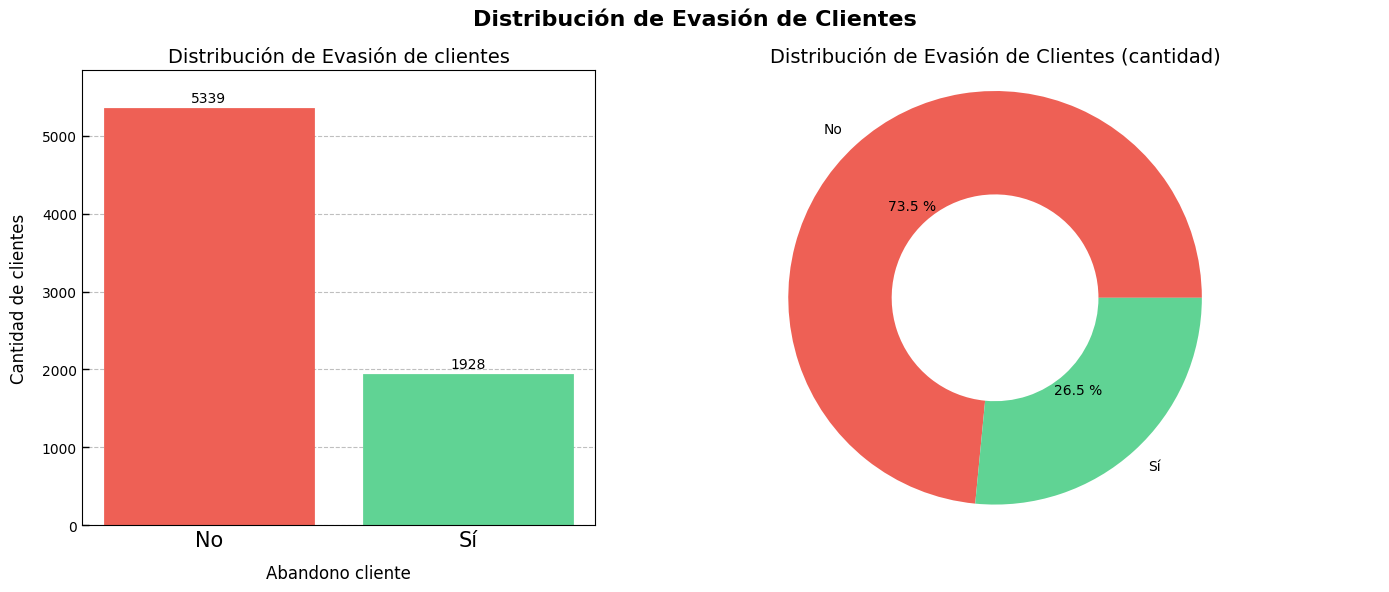

In [ ]:
import matplotlib.pyplot as plt

colores = ["#EE6055", "#60D394"]
Clientes = [Adentro, Afuera]
eleccion = ['No', 'Sí']  # 'No' = permanecen, 'Sí' = abandonaron


# Gráfico de barras junto al gráfico de dona, ambos en la misma figura

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1.5]})

fig.suptitle('Distribución de Evasión de Clientes', fontsize=16, fontweight='bold')
# Gráfico de dona (pie)
wedges, texts, autotexts = ax1.pie(
       Clientes,
       labels=eleccion,
       autopct="%0.1f %%",
       colors=colores,
       wedgeprops=dict(width=0.5)
)
ax1.set_title('Distribución de Evasión de Clientes (cantidad)', fontsize=14)
ax1.axis("equal")

# Gráfico de barras
labels = ['No', 'Sí']
Cantidad = [Adentro, Afuera]
bars = ax2.bar(labels, Cantidad, color=colores, edgecolor=colores, linewidth=2)
ax2.set_ylim(0, max(Cantidad) + 500)
ax2.set_title('Distribución de Evasión de clientes', fontsize=14)
ax2.set_xlabel('Abandono cliente', fontsize=12, labelpad=10)
ax2.set_ylabel('Cantidad de clientes', fontsize=12, labelpad=10)
ax2.bar_label(bars, padding=3, fontsize=10)
ax2.tick_params(axis='x', labelsize=15)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='y', labelsize=10, labelcolor='black', length=5, width=1, direction='in', grid_color='gray', grid_alpha=0.5)

plt.tight_layout()
plt.show()



Clientes que permanecen en el servicio: 1928
Clientes que abandonaron el servicio: 5339


## 📄Informe final